In [11]:
import pandas as pd

In [12]:
#Reading csv file containing Apple's stock market data
df=pd.read_csv('AAPL.csv')

In [13]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-09-28 00:00:00+00:00,113.95,114.64,113.43,113.69,29641085,26.711906,26.873654,26.590009,26.650958,118564340,0.0,1.0
1,AAPL,2016-09-29 00:00:00+00:00,112.18,113.80,111.80,113.16,35886990,26.296987,26.676744,26.207908,26.526716,143547960,0.0,1.0
2,AAPL,2016-09-30 00:00:00+00:00,113.05,113.37,111.80,112.46,36379106,26.500930,26.575944,26.207908,26.362624,145516424,0.0,1.0
3,AAPL,2016-10-03 00:00:00+00:00,112.52,113.05,112.28,112.71,21701760,26.376689,26.500930,26.320428,26.421228,86807040,0.0,1.0
4,AAPL,2016-10-04 00:00:00+00:00,113.00,114.31,112.63,113.06,29736835,26.489209,26.796297,26.402475,26.503274,118947340,0.0,1.0


In [14]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2021-09-20 00:00:00+00:00,142.94,144.8400,141.2700,143.80,123478863,142.94,144.8400,141.2700,143.80,123478863,0.0,1.0
1253,AAPL,2021-09-21 00:00:00+00:00,143.43,144.6000,142.7800,143.93,75833962,143.43,144.6000,142.7800,143.93,75833962,0.0,1.0
1254,AAPL,2021-09-22 00:00:00+00:00,145.85,146.4300,143.7001,144.45,76404341,145.85,146.4300,143.7001,144.45,76404341,0.0,1.0
1255,AAPL,2021-09-23 00:00:00+00:00,146.83,147.0800,145.6400,146.65,64838170,146.83,147.0800,145.6400,146.65,64838170,0.0,1.0
1256,AAPL,2021-09-24 00:00:00+00:00,146.92,147.4701,145.5600,145.66,53477869,146.92,147.4701,145.5600,145.66,53477869,0.0,1.0


In [15]:
#We will use 'close'(last price at which a stock trades during a regular trading session during a particular day) 
#values for prediction other values like 'open' can also be used
df2=df['close']

In [16]:
df2.shape

(1257,)

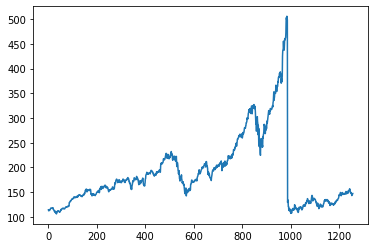

In [17]:
#Plotting the 'close' values for visualization
import matplotlib.pyplot as plt
plt.plot(df2)

In [18]:
#Scaling the data to  a range of (0,1) using MinMaxScaler or nomalizing the data for better prediction 
import numpy as np
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
df2=sc.fit_transform(np.array(np.array(df2).reshape(-1,1)))

In [19]:
df2

array([[0.02058045],
       [0.01615965],
       [0.01833258],
       ...,
       [0.10025476],
       [0.10270243],
       [0.10292722]])

In [20]:
#Splitting the data into training data and test data ,about 2/3rd is training data and rest test data
train_size=int(len(df2)*0.65)
test_size=len(df2)-train_size
train_data,test_data=df2[0:train_size,:],df2[train_size:len(df2),:1]

In [21]:
import numpy
#convert an array of values into a dataset  matrix
def create_dataset(dataset,time_step=1):
  data_x,data_y=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    data_x.append(a)
    data_y.append(dataset[i+time_step,0])
  return numpy.array(data_x),numpy.array(data_y)



In [22]:
#Creating X_train,Y_train out of training data and X_test,Y_test out of test data with time_step=100 using the above function
time_step=100
X_train,Y_train = create_dataset(train_data,time_step)
X_test,Y_test=create_dataset(test_data,time_step)

In [23]:
print(X_train)

[[0.02058045 0.01615965 0.01833258 ... 0.07401718 0.07495379 0.07740147]
 [0.01615965 0.01833258 0.01700884 ... 0.07495379 0.07740147 0.0784255 ]
 [0.01833258 0.01700884 0.0182077  ... 0.07740147 0.0784255  0.07697687]
 ...
 [0.26807033 0.25655627 0.24554174 ... 0.43633548 0.43466207 0.43536141]
 [0.25655627 0.24554174 0.21886708 ... 0.43466207 0.43536141 0.43391278]
 [0.24554174 0.21886708 0.22800839 ... 0.43536141 0.43391278 0.44530196]]


In [24]:
print(X_train.shape)
print(Y_train.shape)

(716, 100)
(716,)


In [25]:
#reshape input to be [samples,timesteps,features] which is required for LSTM
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [26]:
#Creating the Stacked LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

ModuleNotFoundError: No module named 'tensorflow'

In [17]:
#Create a sequential model to which layers can be added
model=Sequential()
#1st LSTM layer 
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(Dropout(0.2))
#2nd LSTM layer
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))
#3rd LSTM layer
model.add(LSTM(50))
model.add(Dropout(0.2))
#Dense layer of dimension 1 for output
model.add(Dense(1))
#Compile the model using defined loss and optimizer
model.compile(loss='mean_squared_error',optimizer='adam')

NameError: name 'Sequential' is not defined

In [18]:
model.summary()

NameError: name 'model' is not defined

In [19]:
#Fitting the model 
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=64,verbose=1)

NameError: name 'model' is not defined

In [20]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [21]:
tf.__version__

NameError: name 'tf' is not defined

In [22]:
#do prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

NameError: name 'model' is not defined

In [23]:
#Transform back to original form
train_predict=sc.inverse_transform(train_predict)
test_predict=sc.inverse_transform(test_predict)

NameError: name 'train_predict' is not defined

In [24]:
#Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
#Of training data
math.sqrt(mean_squared_error(Y_train,train_predict))

NameError: name 'train_predict' is not defined

In [25]:
#Of test data
math.sqrt(mean_squared_error(Y_test,test_predict))

NameError: name 'test_predict' is not defined

In [26]:
#shift train predictions for plotting to align with the original dataset
look_back=100
train_predict_plot=numpy.empty_like(df2)
train_predict_plot[:,:]=np.nan
train_predict_plot[look_back:len(train_predict)+look_back,:]=train_predict

NameError: name 'train_predict' is not defined

In [27]:
#shift test predictions for plotting to align with the original dataset
test_predict_plot=numpy.empty_like(df2)
test_predict_plot[:,:]=np.nan
test_predict_plot[len(train_predict)+(look_back*2)+1:len(df2)-1,:]=test_predict

NameError: name 'test_predict' is not defined

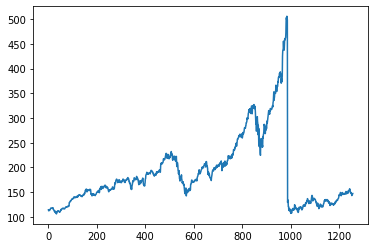

In [28]:
#plot baseline and predictions
plt.plot(sc.inverse_transform(df2))
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.show()

In [29]:
len(test_data)

440

In [30]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [31]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()


In [32]:
#demonstrate prediction for next 30 days
from numpy import array
output=[]
n_steps=100
i=0
while (i<30):

  if (len(temp_input)>100):
    x_input=np.array(temp_input[1:])
    print("{} day input {}".format(i,x_input))
    x_input=x_input.reshape(1,-1)
    x_input=x_input.reshape((1,n_steps,1))
    yhat=model.predict(x_input,verbose=0)
    print("{} day output {}".format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1:]
    output.extend(yhat.tolist())
    i=i+1
  else:
    x_input=x_input.reshape((1,n_steps,1))
    yhat=model.predict(x_input,verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    output.extend(yhat.tolist())
    i=i+1
  


NameError: name 'model' is not defined

In [33]:
#Assigning range of days to variables
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [34]:
import matplotlib.pyplot as plt

ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

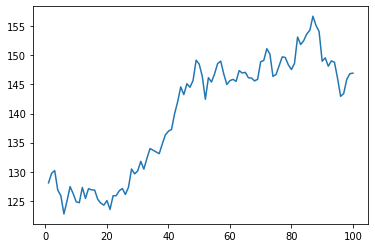

In [35]:
#Converting back to original form and plotting the input and predicted data
plt.plot(day_new,sc.inverse_transform(df2[1157:]))
plt.plot(day_pred,sc.inverse_transform(output))

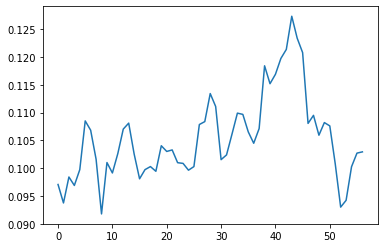

In [36]:
#Combining the both datasets for plotting
df3=df2.tolist()
df3.extend(output)
plt.plot(df3[1200:])